## 차원축소

차원의 저주 : 차원이 낮았을 때는 발생하지 않았던 문제가 **차원이 커지면서** 발생하는 것
차원이 커지면, 관측할 변수가 많아지고 차원이 구성하는 공간의 크기가 커지면서 공간 안의 데이터들 간의 거리가 멀어지고, 그 결과 데이터가 희박해진다.

차원이 증가하면, 동일한 수준의 통계적 유의성을 가지기 위해 훨씬 더 많은 데이터를 요구한다.

#### 차원의 저주를 해결하는 방법
1 . 데이터를 충분히 늘리는 것
데이터의 수가 차원의 수보다 작아지는 시점에 문제가 생기며, 데이터를 설명하는 모형을 찾을 수 없다.
2 . Bow로 표현한 문서의 특성의 수를 줄여 차원 축소를 하는 것
특성 선택으로 현재 있는 특성들 중에서 대표 특성을 선택한다.
문서에 너무 많이 나타나거나 너무 적은 경우 제외한다.
3 . 특성 추출
기존의 특성 값을 조합해 새로운 특성을 생성한다.

### 1. PCA(주성분 분석)를 이용한 차원 축소

데이터의 분산을 최대한 보존하는 새로운 축을 찾아 변환함으로써 차원을 축소하고자 하는 방법

**가장 중요한 원칙**
정보 손실을 방지해야 한다. → 이런 정보량은 분산으로 측정할 수 있다. (차원이 줄어들 때, 분산을 크게 유지해야 한다.)
점들이 넓게 분포하면, 점이 겹쳐질 확률도 줄고 각 점 사이의 거리도 멀어져 점을 더 잘 분별할 수 있다.|

In [6]:
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

X_train = newsgroups_train.data
y_train = newsgroups_train.target

X_test = newsgroups_test.data
y_test = newsgroups_test.target

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import stopwords
cachedStopWords = stopwords.words("english")

from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

RegTok = RegexpTokenizer("[\w']{3,}")
english_stops = set(stopwords.words('english'))

def tokenizer(text):
    tokens = RegTok.tokenize(text.lower())
    words = [word for word in tokens if (word not in english_stops) and len(word) > 2]
    # portr stemmer 적용
    features = (list(map(lambda token: PorterStemmer().stem(token),words)))
    return features

tfidf = TfidfVectorizer(tokenizer=tokenizer)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

C:\Users\ahyeo\anaconda3\envs\TextMining\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [8]:
from sklearn.linear_model import LogisticRegression

LR_clf = LogisticRegression()
LR_clf.fit(X_train_tfidf, y_train)
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_tfidf, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_tfidf, y_test)))

#Train set score: 0.962
#Test set score: 0.761


In [9]:
X_train_tfidf.shape

(2034, 20085)

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2000, random_state= 7) # 20085차원을 2000차원으로 축소
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())

print('Original tfidf matrix shape : ', X_train_tfidf.shape)
print('PCA Converted matrix shape : ', X_train_pca.shape)
print(
    "Sum of explained variance ratio : {:.3f}".format(
        pca.explained_variance_ratio_.sum() # 설명되는 분산 : 100%로, 정보 손실이 발생하지 않음
    )
)

Original tfidf matrix shape :  (2034, 20085)
PCA Converted matrix shape :  (2034, 2000)
Sum of explained variance ratio : 1.000


In [12]:
LR_clf.fit(X_train_pca, y_train)
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_pca, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_pca, y_test))) # 성능 동일

#Train set score: 0.962
#Test set score: 0.761


In [16]:
lasso_clf = LogisticRegression(penalty  ='l1', solver  = "liblinear", C = 1)
lasso_clf.fit(X_train_tfidf, y_train)
print('#Train set score: {:.3f}'.format(lasso_clf.score(X_train_tfidf, y_train)))
print('#Test set score: {:.3f}'.format(lasso_clf.score(X_test_tfidf, y_test)))

import numpy as np
print("#Used features count : {}". format(np.sum(lasso_clf.coef_ != 0 )),
    'out of',
      X_train_tfidf.shape[1])

#Train set score: 0.790
#Test set score: 0.718
#Used features count : 321 out of 20085


In [18]:
pca = PCA(n_components=321, random_state= 7)
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())
print('PCA Converted X shape : ', X_train_pca.shape)
print("Sum of explained Variance ratio : {:.3f}".format(
    pca.explained_variance_ratio_.sum()
))

PCA Converted X shape :  (2034, 321)
Sum of explained Variance ratio : 0.437


In [19]:
LR_clf.fit(X_train_pca, y_train)
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_pca, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_pca, y_test)))

#Train set score: 0.875
#Test set score: 0.751


In [20]:
## 차원을 100개로 줄였을 경우
pca = PCA(n_components=100, random_state= 7)
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())
print('PCA Converted X shape : ', X_train_pca.shape)
print("Sum of explained Variance ratio : {:.3f}".format(
    pca.explained_variance_ratio_.sum()
))

PCA Converted X shape :  (2034, 100)
Sum of explained Variance ratio : 0.211


In [21]:
LR_clf.fit(X_train_pca, y_train)
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_pca, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_pca, y_test)))

#Train set score: 0.807
#Test set score: 0.738


#### 2. LSA를 이용한 차원 축소 및 의미파악

LSA = 잠재 의미 분석
문서들에 잠재된 의미를 분석하고 동시에 단어에 잠재된 의미도 분석한다.

SVD = 특잇값 분해

LSA에서의 차원 축소는 SVD 변형인 **절단된 SVD**에서 이루어진다.

축소된 차원은 잠재적 의미를 나타내고, 문서와 단어를 연결한다.
즉, 문서 벡터가 m개의 차원일 때에는 사용된 단어의 빈도에 기반해 문서를 표현하지만, k개의 차원으로 축소한 후에는 k개의 잠재된 의미를 비중으로 각 문서를 표현한다.
→ k개의 차원은 각각 잠재된 의미를 표현하며 단어 또한 k개의 잠재된 의미의 비중으로 표현되어 있다.


**주의사항**
사이킷런에서 자연어처리를 할 때에는 PCA보다 TruncatedSVD를 사용하는 것이 더 일반적이다.

In [31]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2000, random_state=7)
X_train_lsa = svd.fit_transform(X_train_tfidf)
X_test_lsa = svd.transform(X_test_tfidf)

print("LSA Converted X shape : ", X_train_lsa.shape)
print(
    "Sum of exlained variance ratio : {:.3f}".format(
        svd.explained_variance_ratio_.sum()
    )
)

LR_clf.fit(X_train_lsa, y_train)
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_lsa, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_lsa, y_test)))

LSA Converted X shape :  (2034, 2000)
Sum of exlained variance ratio : 1.000
#Train set score: 0.962
#Test set score: 0.761


In [32]:
svd = TruncatedSVD(n_components=100, random_state=1) #압축할 component의 수 지정
X_train_lsa = svd.fit_transform(X_train_tfidf)
X_test_lsa = svd.transform(X_test_tfidf)

print('LSA Converted X shape:', X_train_lsa.shape)
print('Sum of explained variance ratio: {:.3f}'.format(svd.explained_variance_ratio_.sum()))

LR_clf.fit(X_train_lsa, y_train)
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_lsa, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_lsa, y_test)))

LSA Converted X shape: (2034, 100)
Sum of explained variance ratio: 0.209
#Train set score: 0.810
#Test set score: 0.745


In [33]:
### LSA를 이용한 의미 기반 문서 간 유사도 계산
from sklearn.metrics.pairwise import cosine_similarity

print('#사용된 전체 카테고리:', newsgroups_train.target_names)
print('#첫 문서의 카테고리:', y_train[0])

#변환된 count vector와 기존 값들과의 similarity 계산
sim_result = cosine_similarity([X_train_lsa[0]], X_train_lsa)

print("#Top 20 유사도(lsa):\n", sorted(sim_result[0].round(2), reverse=True)[:20])
sim_index = (-sim_result[0]).argsort()[:20]
print('#Top 20 유사 뉴스의 인덱스(lsa):\n', sim_index) # 유사도 최댓값 : 0.74
sim_labels = [y_train[i] for i in sim_index]
print('#Top 20 유사 뉴스의 카테고리(lsa):\n', sim_labels)

#사용된 전체 카테고리: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']
#첫 문서의 카테고리: 1
#Top 20 유사도(lsa):
 [1.0, 0.74, 0.74, 0.72, 0.7, 0.7, 0.69, 0.67, 0.66, 0.65, 0.65, 0.65, 0.63, 0.62, 0.62, 0.62, 0.57, 0.57, 0.55, 0.54]
#Top 20 유사 뉴스의 인덱스(lsa):
 [   0 1957 1674  501 1995 1490  790 1902 1575 1209 1728  892 1892  998
 1038 1826 1290 1089  867  151]
#Top 20 유사 뉴스의 카테고리(lsa):
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [34]:
#TFIDF에서의 유사도
sim_result = cosine_similarity(X_train_tfidf[0], X_train_tfidf)

print("#Top 20 유사도(lsa) : \n", sorted(sim_result[0].round(2), reverse =True)[:20])
sim_index = (-sim_result[0]).argsort()[:20]
print("#Top 20 유사 뉴스의 인덱스(lsa) : \n", sim_index) # 유사도 최댓값 : 0.3
sim_labels = [y_train[i] for i in sim_index]
print("#Top 20 유사 뉴스의 카테고리(lsa) : \n", sim_labels)

#Top 20 유사도(lsa) : 
 [1.0, 0.3, 0.22, 0.21, 0.19, 0.19, 0.19, 0.17, 0.16, 0.16, 0.16, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.14]
#Top 20 유사 뉴스의 인덱스(lsa) : 
 [   0 1575 1892 1490  501 1290 1013  998 1636 1705 1995 1957 1664  651
 1038  429 1089 1209 1728 1803]
#Top 20 유사 뉴스의 카테고리(lsa) : 
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


#### 잠재적인 토픽 분석

문서들이 잠재된 의미의 비중으로 표현되고 다시 그 잠재된 의미가 단어들과 연관되어 있다면,
**잠재적 의미와 연결된 단어들을 살펴봄**으로써, 문서를 이루고 있는 잠재적 의미가 무엇인지 파악할 수 있다.
이 때, 잠재된 의미를 **토픽**이라고 하고, 이러한 분석을 **토픽 모델링**이라고 한다.

걱 단어의 의미 파악 : TruncatedSVD의 components 속성

In [37]:
svd = TruncatedSVD(n_components = 10, random_state=1)
X_train_lsa = svd.fit_transform(X_train_tfidf)
X_test_lsa = svd.transform(X_test_tfidf)

print('LSA Converted X shape : ', X_train_lsa.shape)
print('Sum of explained variance ratio: {:.3f}'.format(svd.explained_variance_ratio_.sum()))

terms = tfidf.get_feature_names_out()
def get_topics(model, feature_names, n = 10): # 10개의 정보 추출
    for idx, topic in enumerate(model.components_):
        print("Topic %d : "%(idx + 1), # 주제 당 단어
              [feature_names[i] for i in topic.argsort()[:-n-1:-1]])

get_topics(svd, terms)

LSA Converted X shape :  (2034, 10)
Sum of explained variance ratio: 0.045
Topic 1 :  ['would', 'one', 'god', 'think', 'use', 'peopl', 'know', 'like', 'say', 'space']
Topic 2 :  ['file', 'imag', 'thank', 'program', 'graphic', 'space', 'format', 'use', 'color', 'ftp']
Topic 3 :  ['space', 'orbit', 'nasa', 'launch', 'shuttl', 'satellit', 'year', 'moon', 'lunar', 'cost']
Topic 4 :  ['moral', 'object', 'system', 'valu', 'goal', 'think', 'anim', 'absolut', 'natur', 'defin']
Topic 5 :  ['ico', 'bobb', 'tek', 'beauchain', 'bronx', 'manhattan', 'sank', 'queen', 'vice', 'blew']
Topic 6 :  ['god', 'file', 'imag', 'object', 'moral', 'exist', 'space', 'format', 'system', 'color']
Topic 7 :  ['file', 'islam', 'imag', 'cview', 'use', 'format', 'color', 'muslim', 'religion', 'peopl']
Topic 8 :  ['post', 'file', 'space', 'islam', 'read', 'cview', 'format', 'articl', 'group', 'moral']
Topic 9 :  ['christian', 'graphic', 'imag', 'jesu', 'book', 'data', 'group', 'softwar', 'law', 'code']
Topic 10 :  ['ex

#### 단어 간 유사도 분석

문서 간에 나타나는 빈도 분포에 따라 단어 간의 의미적인 유사도를 구할 수 있다.

예를 들어, svd.components_ shape이 (100, 1000) 일 때, 이를 전처행렬로 구하면 모양이 (1000, 100)이 된다.
→ 이 의미는 **1000개의 단어에 대해 100개의 내재된 의미**를 이용해 유사도를 구한다.

In [39]:
tfidf = TfidfVectorizer(max_features=1000, min_df = 5, max_df = 0.5)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

svd = TruncatedSVD(n_components=100, random_state=1)
X_train_lsa = svd.fit_transform(X_train_tfidf)

print("#Components_의 shape : ", svd.components_.shape)
print("#singular_values의 shape : ", svd.singular_values_.shape) # 잠재 의미
t_words = np.diag(svd.singular_values_).dot(svd.components_).T # 전치 행렬
print("#변환된 단어-잠재의미 행렬의 shape : ", t_words.shape)

#t_words에서 space(topic)에 해당하는 벡터를 가져온다.
source = t_words[np.where(tfidf.get_feature_names_out() == 'space')[0][0]]
sim_result = cosine_similarity([source], t_words)

print("#Top 20 유사도(lsa) : \n", sorted(sim_result[0].round(2), reverse =True)[:20])
sim_index = (-sim_result[0]).argsort()[:20]
print("#Top 20 유사 뉴스의 인덱스(tfidf) : \n", sim_index)
sim_labels = [tfidf.get_feature_names_out()[i] for i in sim_index]
print("#Top 20 유사 뉴스의 카테고리(tfidf) : \n", sim_labels)

#Components_의 shape :  (100, 1000)
#singular_values의 shape :  (100,)
#변환된 단어-잠재의미 행렬의 shape :  (1000, 100)
#Top 20 유사도(lsa) : 
 [1.0, 0.73, 0.72, 0.69, 0.66, 0.58, 0.56, 0.56, 0.54, 0.54, 0.52, 0.52, 0.52, 0.51, 0.51, 0.5, 0.5, 0.49, 0.48, 0.47]
#Top 20 유사 뉴스의 인덱스(tfidf) : 
 [812 314 754 829 594 679 720 650 785 565 101 435 606 545 854 746 669 856
 611 564]
#Top 20 유사 뉴스의 카테고리(tfidf) : 
 ['space', 'exploration', 'sci', 'station', 'office', 'propulsion', 'reports', 'planetary', 'shuttle', 'national', 'astro', 'international', 'operations', 'missions', 'technical', 'satellites', 'probes', 'telescope', 'orbiter', 'nasa']


#### tSNE를 이용한 시각화와 차원축소 효과

tSNE는 비지도학습 알고리즘으로, 다차원 데이터 사이의 거리를 가장 잘 보존하는 2차원 좌표를 착기 위해 사용된다.
즉, 2차원 공간으로 데이터 간의 거리를 매핑함으로써 시각적으로 이를 쉽게 파악할 수 있도록 해준다.

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False

In [45]:
from sklearn.manifold import TSNE

tfidf = TfidfVectorizer(tokenizer=tokenizer)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

tsne = TSNE(n_components=2)
tsne_tfidf = tsne.fit_transform(X_train_tfidf)
print('TSNE dimension:', tsne_tfidf.shape)

TypeError: PCA initialization is currently not supported with the sparse input matrix. Use init="random" instead.

In [46]:
def tsne_graph(tsne_2, label, lim=None):
    colors = {0:'blue', 1:'red', 2:'green', 3:'purple'}
    x = tsne_2[:,0] #압축된 첫 차원을 x축으로 이용
    y = tsne_2[:,1] #압축된 둘째 차원은 y축으로 이용
    plt.figure(figsize=(15,10))
    if lim == None:
        lim = [min(x), max(x), min(y), max(y)]
    plt.xlim(lim[0], lim[1])
    plt.ylim(lim[2], lim[3])
    #for i in range(500):
    for i in range(len(x)):
        #각 값에 대해 y값 즉 label에 따라 색을 바꿔가며 text로 그래프에 출력
        if (lim[0] < x[i] < lim[1]) and (lim[2] < y[i] < lim[3]): # 제한을 둔 거리 사이에 있으면, 표기
            plt.text(x[i], y[i], label[i], color = colors[label[i]])
    plt.show()

In [47]:
tsne_graph(tsne_tfidf, y_train, (-4, 5, -5, 5))

NameError: name 'tsne_tfidf' is not defined

LSA Converted X shape :  (2034, 100)
Sum of explained variance ratio: 0.209
TSNE Dimension :  (2034, 2)
#Selected categories :  ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


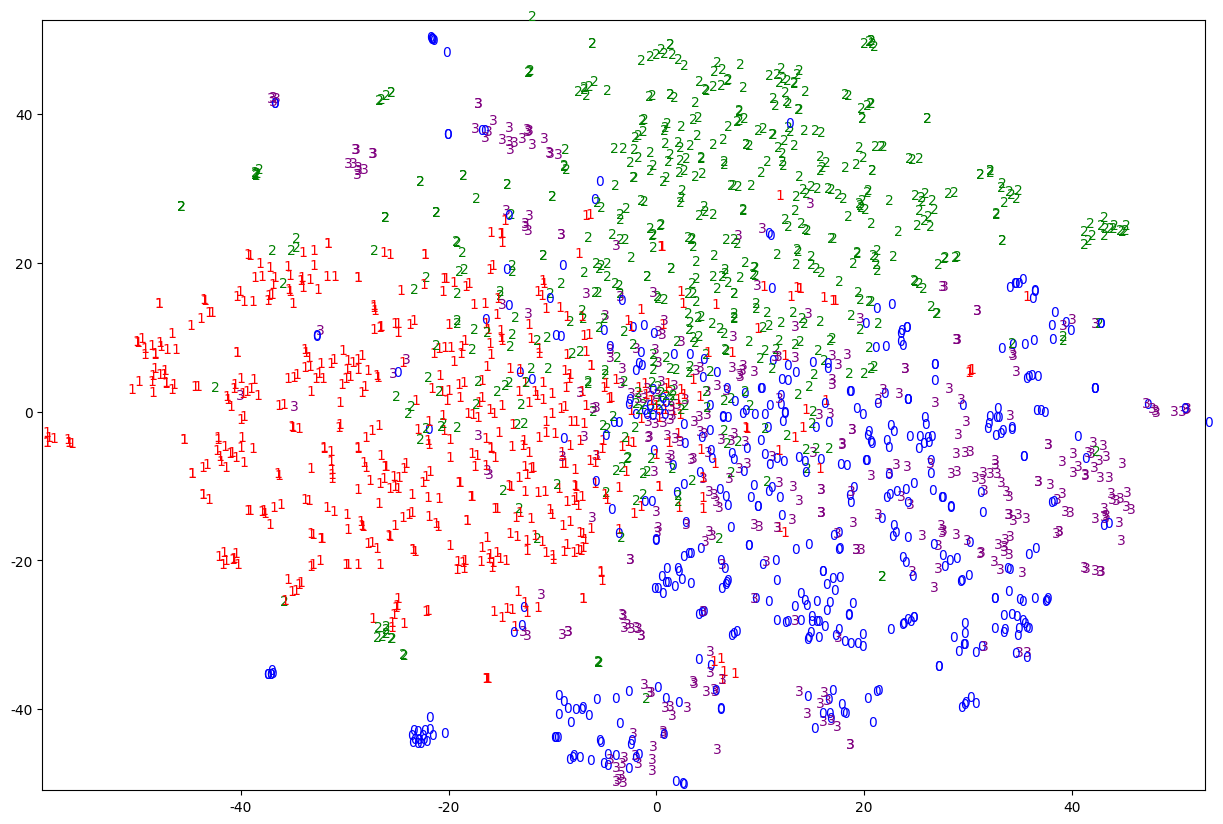

In [48]:
svd = TruncatedSVD(n_components=100, random_state=1)
X_train_lsa = svd.fit_transform(X_train_tfidf)
X_test_lsa = svd.transform(X_test_tfidf)

print('LSA Converted X shape : ', X_train_lsa.shape)
print('Sum of explained variance ratio: {:.3f}'.format(svd.explained_variance_ratio_.sum()))

tsne_lsa = tsne.fit_transform(X_train_lsa)
print("TSNE Dimension : ", tsne_lsa.shape)

print("#Selected categories : ", newsgroups_train.target_names)

tsne_graph(tsne_lsa, y_train)

## 토픽 모델링

텍스트 마이닝 기법 중, 가장 많이 활용되는 기법 중 하나로, **다양한 문서 집합에 내재한 토픽, 주제를 파악할 때** 쓰는 방법이다.
문서 분류가 텍스트의 내용을 파악해서 무엇인가 예측하는 것에 목적을 두었다면, **토픽 모델링은 예측보다는 내용의 분석 자체를 목적으로 하는 기법**이다.

즉, 주어진 텍스트에 대해 사후적으로 분석하는 기법이다.

사용하는 알고리즘 : LDA(Latent Dirichlet Allocation)

<br>

#### 토픽 모델링이란?

문서에 어떠한 내용이 있었는지 **구체적**으로 알고 싶다면, 단어의 빈도를 세는 것으로는 부족하다.
토픽 모델링은 주제별 사용된 단어를 구체적으로 보여준다.

즉, 내제된 주제의 분석을 가능하게 하는 기법이며 주제들이 시간에 따라 어떻게 변화했는지 살펴보는 **토픽 트렌드** 분석이다.

#### LDA 모형의 구조

LDA는 토픽 모델링에서 가장 널리 쓰이고 있는 기본적인 알고리즘이다.
각 문서에 내제된 주제 혹은 토픽이며, 이러한 내제된 주제를 유추하고자 하는 통계적 방법론이다.

**구조**

1 . 토픽 모델링은 전체 문서에 공통적으로 내재한 토픽들을 식별한다.
각 문서가 개별적으로 전혀 다른 토픽들로 구성되는 것이 아니고, 전체 말뭉치를 관통하는 **공통적인** 토픽들이 있으며, 이들이 다양한 비중으로 결합된 것이다.
문서에 따른 토픽의 확률분포를 추정하는 것이 첫 번째 목표이다.

한 개의 문서에는 여러 개의 토픽이 존재하고, 그 토픽은 확률값을 가진다.
우리의 문서의 토픽 분포는 디리클레 분포를 따른다.

2 . 각 토픽의 단어 분포를 알아낸다. 토픽은 그 토픽을 구성하는 단어의 비중으로 표현한다.
문서의 토픽 분포와 각 토픽의 단어의 분포가 결합됨으로써 문서의 단어 분포가 결정된다.

즉, 어떤 문서에 사용된 단어의 분포(각 단어의 빈도)는 이 문서에 잠재된 토픽에 의해 결정되는데, 각 토픽은 단어의 분포이므로, 이것들이 결합되어 문서에 사용된 단어의 분포가 된다.

**결론**

각 문서에 사용된 단어들의 빈도를 측정하고, 이로부터 역으로 모든 문서의 토픽분포와 각 토픽의 단어 분포를 추정한다.

**성능에 대한 척도**
혼란도, 토픽 응집도

혼란도(perplexity) : 특정한 확률 모형이 실제로 관측되는 값을 얼마나 유사하게 예측하는지 평가할 때 사용한다. / 확률 모형이 주어진 문서 집합을 얼마나 유사하게 생성하는가
토픽 응집도(topic coherence) : 각 토픽에서 상위 비중을 차지하는 단어들이 의미적으로 유사한지 나타내는 척도

통계적 검증보다는, 최적값 근처의 여러 모형을 가지고 사람이 직접 비교하는 것이 좋다.

**사용 패키지**
사이킷런(혼란도만 제공), Gensim(더 많이 사용)

In [50]:
## 데이터 준비
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space',
              'comp.sys.ibm.pc.hardware', 'sci.crypt']

#학습 데이터셋을 가져옴
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)

print('#Train set size:', len(newsgroups_train.data))
print('#Selected categories:', newsgroups_train.target_names)

#Train set size: 3219
#Selected categories: ['alt.atheism', 'comp.graphics', 'comp.sys.ibm.pc.hardware', 'sci.crypt', 'sci.space', 'talk.religion.misc']


In [51]:
## 카운트 벡터 생성
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(token_pattern="[\w']{3,}", stop_words='english', max_features=2000, min_df = 5, max_df = 0.5) #특성의 개수를 제한하지 않는 것이 성능이 좋으나, 오래 걸림
review_cv = cv.fit_transform(newsgroups_train.data)

#### 사이킷런의 LDA 매개변수
n_components : topic의 개수 (가장 중요한 hyper parameter)
max_iter : 최대 반복 횟수 (default : 10)
topic_word_prior : 토픽의 사전 단어분포를 결정하는 매개변수 (beta)
doc_topic_prior : 문서의 사전 토픽 분포 (alpha)
learning_method : batch, online
n_jobs : 사용하는 프로세서 수 (-1이면, 모든 프로세서 활용)

In [ ]:
##pg 162